In [1]:
import pickle
import numpy as np 

In [2]:
with open("train_qa.txt","rb") as fp:
    train_data = pickle.load(fp)

In [3]:
train_data

[(['Mary',
   'moved',
   'to',
   'the',
   'bathroom',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'bedroom',
   '.'],
  ['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
  'no'),
 (['Mary',
   'moved',
   'to',
   'the',
   'bathroom',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'went',
   'back',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'hallway',
   '.'],
  ['Is', 'Daniel', 'in', 'the', 'bathroom', '?'],
  'no'),
 (['Mary',
   'moved',
   'to',
   'the',
   'bathroom',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'went',
   'back',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'hallway',
   '.',
   'Sandra',
   'went',
   'to',
   'the',
   'kitchen',
   '.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'bathroom',
   '.'],
  ['Is', 'Daniel', 'in', 'the', '

In [4]:
with open ("test_qa.txt","rb") as fp:
    test_data = pickle.load(fp)

In [5]:
test_data

[(['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.'],
  ['Is', 'John', 'in', 'the', 'kitchen', '?'],
  'no'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'discarded',
   'the',
   'milk',
   '.',
   'John',
   'went',
   'to',
   'the',
   'garden',
   '.'],
  ['Is', 'John', 'in', 'the', 'kitchen', '?'],
  'no'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'discarded',
   'the',
   'milk',
   '.',
   'John',
   'went',
   'to',
   'the',
   'garden',
   '.',
   'Daniel',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'to',
   'the',
   'garden',
   '.'],
  ['Is', 'John', 'in', 'the', 'garden', '?'],
  'yes'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',


In [6]:
vocab = set()

In [7]:
all_data = train_data + test_data

In [8]:
for story , question , answer in all_data :
    vocab = vocab.union(set(story))
    vocab = vocab.union(set(question))

In [9]:
vocab.add ('yes')
vocab.add('no')

In [10]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [11]:
vocab_len=len(vocab) + 1

In [12]:
max_story_len = max([len(data[0]) for data in all_data])
max_story_len

156

In [13]:
max_ques_len = max([len(data[1]) for data in all_data])
max_ques_len

6

In [14]:
!pip install tensorFlow
!pip install keras


In [15]:
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

In [16]:
tokenizer = Tokenizer(filters={})

In [17]:
tokenizer.fit_on_texts(vocab)

In [18]:
tokenizer.word_index

{'left': 1,
 'took': 2,
 'kitchen': 3,
 'bathroom': 4,
 'apple': 5,
 'picked': 6,
 'discarded': 7,
 'milk': 8,
 'went': 9,
 'football': 10,
 '?': 11,
 'no': 12,
 'bedroom': 13,
 'up': 14,
 'john': 15,
 'dropped': 16,
 'hallway': 17,
 'journeyed': 18,
 'garden': 19,
 'down': 20,
 'mary': 21,
 'got': 22,
 'back': 23,
 'there': 24,
 '.': 25,
 'daniel': 26,
 'sandra': 27,
 'put': 28,
 'office': 29,
 'in': 30,
 'is': 31,
 'travelled': 32,
 'to': 33,
 'yes': 34,
 'grabbed': 35,
 'the': 36,
 'moved': 37}

In [19]:
train_story_text = []
train_ques_text = []
train_ans_text = []

In [20]:
for story,ques,ans in train_data:
    train_story_text.append(story)
    train_ques_text.append(ques)
   

In [21]:
train_story_seq =  tokenizer.texts_to_sequences(train_story_text)

In [22]:
train_story_seq

[[21, 37, 33, 36, 4, 25, 27, 18, 33, 36, 13, 25],
 [21,
  37,
  33,
  36,
  4,
  25,
  27,
  18,
  33,
  36,
  13,
  25,
  21,
  9,
  23,
  33,
  36,
  13,
  25,
  26,
  9,
  23,
  33,
  36,
  17,
  25],
 [21,
  37,
  33,
  36,
  4,
  25,
  27,
  18,
  33,
  36,
  13,
  25,
  21,
  9,
  23,
  33,
  36,
  13,
  25,
  26,
  9,
  23,
  33,
  36,
  17,
  25,
  27,
  9,
  33,
  36,
  3,
  25,
  26,
  9,
  23,
  33,
  36,
  4,
  25],
 [21,
  37,
  33,
  36,
  4,
  25,
  27,
  18,
  33,
  36,
  13,
  25,
  21,
  9,
  23,
  33,
  36,
  13,
  25,
  26,
  9,
  23,
  33,
  36,
  17,
  25,
  27,
  9,
  33,
  36,
  3,
  25,
  26,
  9,
  23,
  33,
  36,
  4,
  25,
  26,
  6,
  14,
  36,
  10,
  24,
  25,
  26,
  9,
  33,
  36,
  13,
  25],
 [21,
  37,
  33,
  36,
  4,
  25,
  27,
  18,
  33,
  36,
  13,
  25,
  21,
  9,
  23,
  33,
  36,
  13,
  25,
  26,
  9,
  23,
  33,
  36,
  17,
  25,
  27,
  9,
  33,
  36,
  3,
  25,
  26,
  9,
  23,
  33,
  36,
  4,
  25,
  26,
  6,
  14,
  36,
  10,
  24,
  

In [95]:
def Vectorised_Data(data, word_index = tokenizer.word_index,max_story_len = max_story_len ,max_ques_len=max_ques_len):
    X= []
    XQ =[]
    Y = []
    for story,ques,ans in data:
        x = [word_index[word.lower()] for word in story]
        xq = [word_index[word.lower()] for word in ques]
        y = np.zeros(len(word_index)+1)
        y[word_index[ans]] = 1
            
        X.append(x)
        XQ.append(xq)
        Y.append(y)
    return (pad_sequences(X,max_story_len)),(pad_sequences(XQ,max_ques_len)),(np.array(Y))



In [96]:
inputs_train , Queries_train , ans_train = Vectorised_Data(train_data)

In [97]:
inputs_train

array([[ 0,  0,  0, ..., 36, 13, 25],
       [ 0,  0,  0, ..., 36, 17, 25],
       [ 0,  0,  0, ..., 36,  4, 25],
       ...,
       [ 0,  0,  0, ..., 36, 13, 25],
       [ 0,  0,  0, ...,  8, 24, 25],
       [ 0,  0,  0, ...,  5, 24, 25]])

In [98]:
inputs_test , Queries_test , ans_test = Vectorised_Data(test_data)

In [99]:
inputs_train

array([[ 0,  0,  0, ..., 36, 13, 25],
       [ 0,  0,  0, ..., 36, 17, 25],
       [ 0,  0,  0, ..., 36,  4, 25],
       ...,
       [ 0,  0,  0, ..., 36, 13, 25],
       [ 0,  0,  0, ...,  8, 24, 25],
       [ 0,  0,  0, ...,  5, 24, 25]])

In [100]:
from keras.models import Sequential , Model
from keras.layers import Embedding
from keras.layers import Input , Activation , Dense , Permute , Dropout , concatenate , add ,dot , LSTM

In [101]:
input_sequence = Input((max_story_len,))
ques_sequence = Input((max_ques_len,))

In [102]:
input_encoder_m = Sequential()
input_encoder_m.add (Embedding(input_dim = vocab_len, output_dim = 64))
input_encoder_m.add(Dropout(0.2))

In [103]:
input_encoder_c = Sequential()
input_encoder_c.add (Embedding(input_dim = vocab_len, output_dim = max_ques_len))
input_encoder_c.add(Dropout(0.2))

In [104]:
ques_encoder = Sequential()
ques_encoder.add (Embedding(input_dim = vocab_len, input_length = max_ques_len ,output_dim = 64))
ques_encoder.add(Dropout(0.2))

In [105]:
input_encoded_m = input_encoder_m(input_sequence)
input_encoded_c = input_encoder_c(input_sequence)
ques_encoded = ques_encoder(ques_sequence)


In [106]:
match = dot([input_encoded_m,ques_encoded] , axes =(2,2))
match = Activation('softmax')(match)

In [107]:
response = add([match,input_encoded_c])
response = Permute((2,1))(response)

In [108]:
answer = concatenate([response,ques_encoded])

In [109]:
answer = LSTM(32)(answer)

In [110]:
answer = Dropout(0.5)(answer)

In [111]:
answer = Dense(vocab_len)(answer)

In [112]:
answer = Activation('softmax')(answer)

In [113]:
model = Model([input_sequence,ques_sequence],answer)
model.compile(optimizer = 'rmsprop',loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [114]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 156)]                0         []                            
                                                                                                  
 input_4 (InputLayer)        [(None, 6)]                  0         []                            
                                                                                                  
 sequential_3 (Sequential)   (None, None, 64)             2432      ['input_3[0][0]']             
                                                                                                  
 sequential_5 (Sequential)   (None, 6, 64)                2432      ['input_4[0][0]']             
                                                                                            

In [150]:
history = model.fit([inputs_train,Queries_train],ans_train, validation_data =([inputs_test,Queries_test],ans_test), batch_size =32,epochs=35)

Epoch 1/35
313/313 [==============================] - 3s 9ms/step - loss: 0.6948 - accuracy: 0.4998 - val_loss: 0.6931 - val_accuracy: 0.5250
Epoch 2/35
313/313 [==============================] - 4s 12ms/step - loss: 0.6946 - accuracy: 0.5037 - val_loss: 0.6932 - val_accuracy: 0.5030
Epoch 3/35
313/313 [==============================] - 5s 14ms/step - loss: 0.6955 - accuracy: 0.4956 - val_loss: 0.6935 - val_accuracy: 0.5030
Epoch 4/35
313/313 [==============================] - 5s 15ms/step - loss: 0.6948 - accuracy: 0.5069 - val_loss: 0.6930 - val_accuracy: 0.5250
Epoch 5/35
313/313 [==============================] - 5s 15ms/step - loss: 0.6948 - accuracy: 0.4995 - val_loss: 0.6933 - val_accuracy: 0.4960
Epoch 6/35
313/313 [==============================] - 6s 18ms/step - loss: 0.6952 - accuracy: 0.4950 - val_loss: 0.6936 - val_accuracy: 0.5030
Epoch 7/35
313/313 [==============================] - 7s 23ms/step - loss: 0.6948 - accuracy: 0.4980 - val_loss: 0.6939 - val_accuracy: 0.5030


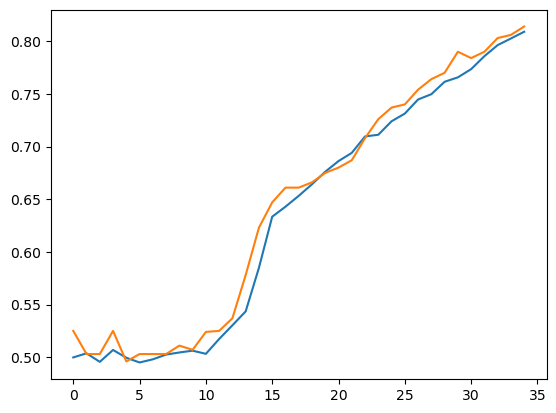

In [151]:
import matplotlib.pyplot as plt 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [189]:
model.save("CHATBOT")

INFO:tensorflow:Assets written to: CHATBOT\assets


INFO:tensorflow:Assets written to: CHATBOT\assets


In [220]:
model.load_weights("CHATBOT")

In [221]:
pred_res = model.predict((inputs_test,Queries_test))

32/32 [==============================] - 0s 2ms/step


In [222]:
test_data[0][0]

['Mary',
 'got',
 'the',
 'milk',
 'there',
 '.',
 'John',
 'moved',
 'to',
 'the',
 'bedroom',
 '.']

In [223]:
story = ' '.join(word for word in test_data[0][0])

In [224]:
story

'Mary got the milk there . John moved to the bedroom .'

In [225]:
Query = ' '.join(word for word in test_data[0][1])

In [226]:
Query

'Is John in the kitchen ?'

In [227]:
test_data[0][2]

'no'

In [228]:
val_max = np.argmax(pred_res[0])

for key , val in tokenizer.word_index.items():
    if val == val_max:
        k = key
        
print("predicted ans is",k)
print(" probability of certainity", pred_res[0][val_max])

predicted ans is no
 probability of certainity 0.59734315


In [229]:
story = "Mary dropped the football . Daniel journeyed to the office . "
story.split()

['Mary',
 'dropped',
 'the',
 'football',
 '.',
 'Daniel',
 'journeyed',
 'to',
 'the',
 'office',
 '.']

In [238]:
my_ques = "Is Mary dropped the football ?"
my_ques.split()

['Is', 'Mary', 'dropped', 'the', 'football', '?']

In [239]:
mydata = [(story.split(),my_ques.split(),'no')]

In [240]:
my_story,my_quest,my_ans = Vectorised_Data(mydata)

In [241]:
pred_res = model.predict((my_story,my_quest))

1/1 [==============================] - 0s 33ms/step


In [242]:
val_max = np.argmax(pred_res[0])

for key , val in tokenizer.word_index.items():
    if val == val_max:
        k = key
        
print("predicted ans is",k)
print(" probability of certainity", pred_res[0][val_max])

predicted ans is yes
 probability of certainity 0.82164085
